## Challange https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/

In [30]:
# importing necesary libraries

 

%matplotlib inline

import pandas as pd

import numpy as np

import glob

import os

import datetime

import statsmodels

from matplotlib import pyplot as plt

import seaborn as sns

import sys

import plotly.express as px

import warnings

import plotly

from plotly.subplots import make_subplots

import plotly.graph_objects as go

warnings.filterwarnings("ignore")

plotly.offline.init_notebook_mode(connected=True)

 

from IPython.display import display

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

 

import sys

print(sys.version)

print(sys.path)

3.7.6 (default, Dec 30 2019, 13:29:21) 
[Clang 11.0.0 (clang-1100.0.33.16)]
['/Users/tswiton/dev/data_upskill/e2', '/Users/tswiton/dev/data_upskill', '/usr/local/Cellar/python/3.7.6/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/usr/local/Cellar/python/3.7.6/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/usr/local/Cellar/python/3.7.6/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Users/tswiton/.virtualenvs/data_upskill/lib/python3.7/site-packages', '/Users/tswiton/.virtualenvs/data_upskill/lib/python3.7/site-packages/setuptools-40.8.0-py3.7.egg', '/Users/tswiton/.virtualenvs/data_upskill/lib/python3.7/site-packages/pip-19.0.3-py3.7.egg', '/Users/tswiton/.virtualenvs/data_upskill/lib/python3.7/site-packages/IPython/extensions', '/Users/tswiton/.ipython']


In [2]:
!wget https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv

--2020-01-12 21:12:28--  https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.93.85
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.93.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20069199 (19M) [text/csv]
Saving to: ‘4910797b-ee55-40a7-8668-10efd5c1b960.csv’

4910797b-ee55-40a7- 100%[===================>]  19.14M  1.45MB/s    in 26s     

2020-01-12 21:12:54 (759 KB/s) - ‘4910797b-ee55-40a7-8668-10efd5c1b960.csv’ saved [20069199/20069199]



In [3]:
!wget https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv

--2020-01-12 21:13:51--  https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.110.45
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.110.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148327 (1.1M) [text/csv]
Saving to: ‘0bf8bc6e-30d0-4c50-956a-603fc693d966.csv’

0bf8bc6e-30d0-4c50- 100%[===================>]   1.09M   670KB/s    in 1.7s    

2020-01-12 21:13:56 (670 KB/s) - ‘0bf8bc6e-30d0-4c50-956a-603fc693d966.csv’ saved [1148327/1148327]



In [16]:
!wget https://s3.amazonaws.com/drivendata/data/7/public/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv

--2020-01-12 21:15:58--  https://s3.amazonaws.com/drivendata/data/7/public/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.178.93
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.178.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5016337 (4.8M) [text/csv]
Saving to: ‘702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv’

702ddfc5-68cd-4d1d- 100%[===================>]   4.78M   933KB/s    in 5.5s    

2020-01-12 21:16:05 (893 KB/s) - ‘702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv’ saved [5016337/5016337]



In [14]:
data = pd.read_csv("4910797b-ee55-40a7-8668-10efd5c1b960.csv")
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [15]:
labels = pd.read_csv("0bf8bc6e-30d0-4c50-956a-603fc693d966.csv")
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [18]:
test_data = pd.read_csv("702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv")
test_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [29]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1,-0.00532096,-0.00469226,-0.00134774,0.00171845,-0.00262871,-0.00302829,-0.0030437,-0.00281275,-0.00208209
amount_tsh,-0.00532096,1,0.0766503,0.0221342,-0.0526702,0.00294373,-0.026813,-0.0235994,0.0162876,0.0679152
gps_height,-0.00469226,0.0766503,1,0.149155,-0.0357514,0.00723688,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.00134774,0.0221342,0.149155,1,-0.425802,0.0238733,0.034197,0.151398,0.0865897,0.396732
latitude,0.00171845,-0.0526702,-0.0357514,-0.425802,1,0.00683683,-0.221018,-0.20102,-0.0221519,-0.245278
num_private,-0.00262871,0.00294373,0.00723688,0.0238733,0.00683683,1,-0.0203768,-0.00447751,0.00381836,0.0260556
region_code,-0.00302829,-0.026813,-0.183521,0.034197,-0.221018,-0.0203768,1,0.678602,0.0940884,0.0317241
district_code,-0.0030437,-0.0235994,-0.171233,0.151398,-0.20102,-0.00447751,0.678602,1,0.0618314,0.0483152
population,-0.00281275,0.0162876,0.135003,0.0865897,-0.0221519,0.00381836,0.0940884,0.0618314,1,0.26091
construction_year,-0.00208209,0.0679152,0.658727,0.396732,-0.245278,0.0260556,0.0317241,0.0483152,0.26091,1


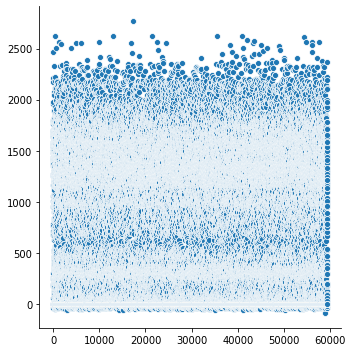

In [35]:
sns.relplot(data=data["gps_height"])